In [11]:

import pandas as pd
import geopandas as gpd
import re
import numpy as np

In [2]:
df = pd.read_csv('./santiago.csv')
df['area'] = df.descriptions_0_label.apply(lambda x: get_int(x))

/tmp/ipykernel_4760/1976219942.py:1: DtypeWarning: Columns (71,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./santiago.csv')


In [12]:
def get_int(x):
    try:
        return int(re.findall("(\d*.?\d*) ",x)[0].replace(',','.'))
    except:
        return np.nan
df['area'] = df.descriptions_0_label.apply(lambda x: get_int(x))

In [14]:
z = df[['latitude','longitude','price_amount','area']]

In [24]:
z['priceM2'] = z.price_amount/z.area

/tmp/ipykernel_4760/4124563890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['priceM2'] = z.price_amount/z.area


In [25]:
gdf = gpd.GeoDataFrame(
    z, geometry=gpd.points_from_xy(z.longitude, z.latitude),crs='epsg:4326')

<AxesSubplot:ylabel='Frequency'>

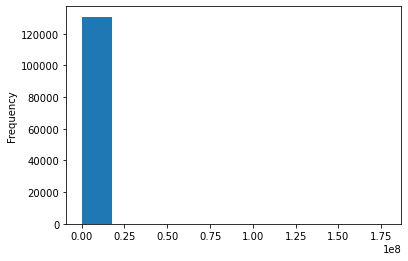

In [28]:
gdf.priceM2.plot.hist()

In [40]:
import plotly.express as px
gdf_plot = gdf.query("""priceM2<100 """).sample(frac=0.8)
fig = px.scatter_mapbox(gdf_plot, lat=gdf_plot.geometry.y, lon=gdf_plot.geometry.x,
                        color="priceM2",
                  #color_continuous_scale=px.colors.cyclical.IceFire, 
                  size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map",
                paper_bgcolor='rgba(0,0,0,0)',
                autosize=False,
                width=800,
                height=800
                )
fig.show()